# **Book Recommendation System**

In [1]:
from logging import warning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data set
books = pd.read_csv('/content/Books.csv', sep=',',on_bad_lines='skip',encoding='latin-1')
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('/content/Users.csv', sep=',', on_bad_lines='skip')
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('/content/Ratings.csv', sep=',', on_bad_lines='skip')
ratings.columns = ['userID', 'ISBN', 'bookRating']


In [3]:
books.head()
users.head()
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
print(books.shape)
print(list(books.columns))

print(users.shape)
print(list(users.columns))

print(ratings.shape)
print(list(ratings.columns))

(271360, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
(278858, 3)
['userID', 'Location', 'Age']
(1149780, 3)
['userID', 'ISBN', 'bookRating']


In [5]:
books.isnull().sum()
users.isnull().sum()
ratings.isnull().sum()

,0
userID,0
ISBN,0
bookRating,0


In [6]:
books.duplicated().sum
users.duplicated().sum
ratings.duplicated().sum

<bound method Series.sum of 0          False
1          False
2          False
3          False
4          False
           ...  
1149775    False
1149776    False
1149777    False
1149778    False
1149779    False
Length: 1149780, dtype: bool>

In [7]:
#To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded
counts1=ratings['userID'].value_counts()
ratings=ratings[ratings['userID'].isin(counts1[counts1>=200].index)]
counts2=ratings['bookRating'].value_counts()
ratings=ratings[ratings['bookRating'].isin(counts2[counts2>=100].index)]

In [8]:


combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
print(combine_book_rating.head())

   userID        ISBN  bookRating  \
0  277427  002542730X          10   
1  277427  0026217457           0   
2  277427  003008685X           8   
3  277427  0030615321           0   
4  277427  0060002050           0   

                                           bookTitle  
0  Politically Correct Bedtime Stories: Modern Ta...  
1                 Vegetarian Times Complete Cookbook  
2                                           Pioneers  
3   Ask for May, Settle for June (A Doonesbury book)  
4                  On a Wicked Dawn (Cynster Novels)  


In [9]:
#Now we will group by book titles and create a new column for total rating count
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
print(book_ratingCount.head())

                                           bookTitle  totalRatingCount
0   A Light in the Storm: The Civil War Diary of ...                 2
1                              Always Have Popsicles                 1
2               Apple Magic (The Collector's series)                 1
3   Beyond IBM: Leadership Marketing and Finance ...                 1
4   Clifford Visita El Hospital (Clifford El Gran...                 1


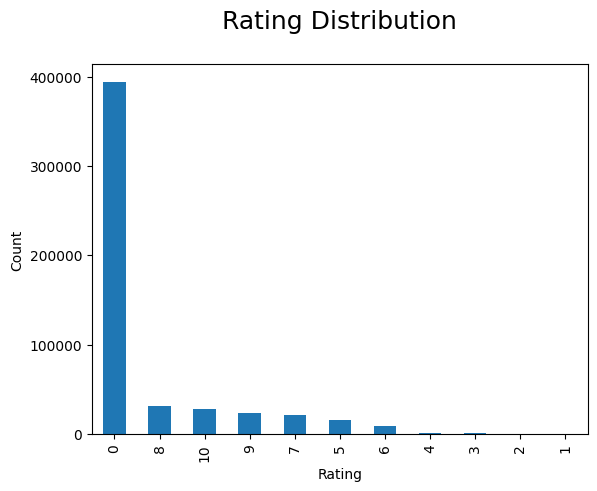

In [10]:
#Plot bar for rating destribution

ratings['bookRating'].value_counts(sort=True).plot(kind='bar')
plt.rc('font', size=15)
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show
plt.savefig('Count_of_Rating.png')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

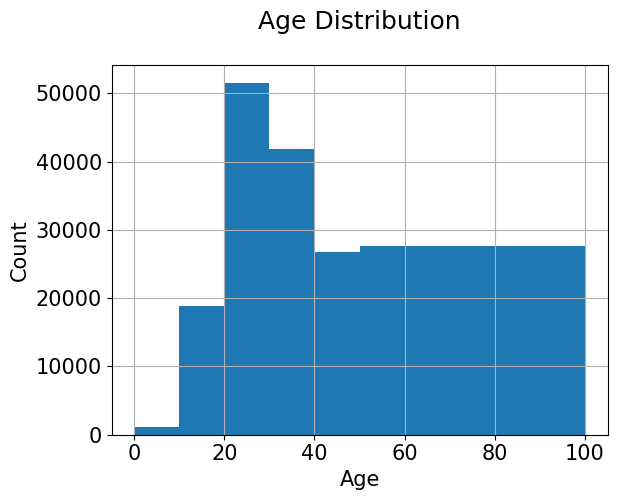

In [11]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt

In [12]:


#combine_book_rating = combine_book_rating[combine_book_rating.index.notnull()]


#book_ratingCount = (combine_book_rating.
 #    groupby(by = ['bookTitle'])['bookRating'].
 #   count().
 # rename(columns = {'bookRating': 'totalRatingCount'})
 # [['bookTitle', 'totalRatingCount']]
 #  )
 #print(book_ratingCount.head())


In [14]:
#Now we will combine the rating data with the total rating count data, this gives us exactly what we need to find out which books are popular and filter out lesser-known books
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
print(rating_with_totalRatingCount.head())

pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

   userID        ISBN  bookRating  \
0  277427  002542730X          10   
1  277427  0026217457           0   
2  277427  003008685X           8   
3  277427  0030615321           0   
4  277427  0060002050           0   

                                           bookTitle  totalRatingCount  
0  Politically Correct Bedtime Stories: Modern Ta...                82  
1                 Vegetarian Times Complete Cookbook                 7  
2                                           Pioneers                 1  
3   Ask for May, Settle for June (A Doonesbury book)                 1  
4                  On a Wicked Dawn (Cynster Novels)                13  
count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [15]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   160576.000
mean         3.044
std          7.428
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        365.000
Name: totalRatingCount, dtype: float64


In [16]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    5.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    8.000
0.950   10.000
0.960   11.000
0.970   14.000
0.980   19.000
0.990   31.000
Name: totalRatingCount, dtype: float64


In [17]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
print(rating_popular_book.head())

    userID        ISBN  bookRating  \
0   277427  002542730X          10   
13  277427  0060930535           0   
15  277427  0060934417           0   
18  277427  0061009059           9   
24  277427  006440188X           0   

                                            bookTitle  totalRatingCount  
0   Politically Correct Bedtime Stories: Modern Ta...                82  
13                      The Poisonwood Bible: A Novel               133  
15                                 Bel Canto: A Novel               108  
18  One for the Money (Stephanie Plum Novels (Pape...               108  
24                                  The Secret Garden                79  


In [18]:
if 'userID' not in rating_popular_book.columns:
    rating_popular_book = rating_popular_book.merge(combine_book_rating[['bookTitle', 'userID']], on='bookTitle', how='left')


In [19]:
#Filter to users in US and Canada only
# Preserve necessary columns when filtering

combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
print(us_canada_user_rating.head())


   userID        ISBN  bookRating  \
0  277427  002542730X          10   
1  277427  0060930535           0   
2  277427  0060934417           0   
3  277427  0061009059           9   
4  277427  006440188X           0   

                                           bookTitle  totalRatingCount  \
0  Politically Correct Bedtime Stories: Modern Ta...                82   
1                      The Poisonwood Bible: A Novel               133   
2                                 Bel Canto: A Novel               108   
3  One for the Money (Stephanie Plum Novels (Pape...               108   
4                                  The Secret Garden                79   

                Location  
0  gilbert, arizona, usa  
1  gilbert, arizona, usa  
2  gilbert, arizona, usa  
3  gilbert, arizona, usa  
4  gilbert, arizona, usa  


In [20]:
!pip install xgboost scikit-learn

In [26]:
#Implementing KNN
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)
print(model_knn)

NearestNeighbors(algorithm='brute', metric='cosine')


In [27]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
print(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1))
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
us_canada_user_rating_pivot.index[query_index]

91
[[ 0.  0.  0.  5.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  7.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  4.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  8.  0.  0.  0.  0.  0.  0.  

'Breath, Eyes, Memory'

In [28]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Breath, Eyes, Memory:

1: Drowning Ruth, with distance of 0.7038114558809216:
2: Song of Solomon (Oprah's Book Club (Paperback)), with distance of 0.7179066065120301:
3: River, Cross My Heart, with distance of 0.7340442519963144:
4: We Were the Mulvaneys, with distance of 0.7447153665409483:
5: The Poisonwood Bible, with distance of 0.749411486149627:


In [29]:
import pickle

# Save the KNN model
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(model_knn, file)

# Save the us_canada_user_rating_pivot DataFrame
us_canada_user_rating_pivot.to_pickle('user_rating_pivot.pkl')

In [31]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.0 MB/s eta 0:00:00


In [32]:
import streamlit as st
import pickle
import pandas as pd

# Load the saved model and data
with open('knn_model.pkl', 'rb') as file:
    model_knn = pickle.load(file)
us_canada_user_rating_pivot = pd.read_pickle('user_rating_pivot.pkl')

def recommend_books(book_title, model, pivot_df, num_recommendations=5):
    try:
        book_index = pivot_df.index.get_loc(book_title)
        distances, indices = model.kneighbors(pivot_df.iloc[book_index, :].values.reshape(1, -1), n_neighbors=num_recommendations + 1)
        recommendations = [pivot_df.index[indices.flatten()[i]] for i in range(1, len(distances.flatten()))]
        return recommendations
    except KeyError:
        st.write("Book not found in the dataset.")
        return []

st.title('Book Recommendation System (KNN)')

book_title = st.text_input('Enter a book title:')

if book_title:
    recommendations = recommend_books(book_title, model_knn, us_canada_user_rating_pivot)
    if recommendations:
        st.write('Recommended books:')
        for book in recommendations:
            st.write(book)

2025-02-05 10:08:54.576 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 10:08:54.736 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-05 10:08:54.741 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 10:08:54.746 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 10:08:54.750 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 10:08:54.751 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 10:08:54.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-05 10:08:54.760 Session state does not 

In [34]:
# Define the libraries you need
libraries = ["streamlit", "pandas", "scikit-learn",]

# Create and save the requirements.txt file
with open("requirements.txt", "w") as f:
    for lib in libraries:
        f.write(lib + "\n")
